In [210]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math
import statsmodels.api as sm
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
%matplotlib inline

In [211]:
conda install -c damianavila82 rise

Solving environment: ...working... done

# All requested packages already installed.
Note: you may need to restart the kernel to use updated packages.




Using the pandas read_csv() function, read the GDP dataset into your
notebook as a DataFrame called gdp_df
Take a look at the first 10 rows.
Look at the last 5 rows. Do you see a problem?
Redo the read_csv() call to correct this issue - do not modify the
original csv file.

In [212]:
gdp_df = pd.read_csv("gdppercap.csv")

In [213]:
gdp_df = gdp_df.drop(gdp_df.index[-2:])

Drop the ‘Value Footnotes’ column, and rename the remaining columns to
‘Country’, ‘Year’, and ‘GDP_Per_Capita’

In [214]:
gdp_df = gdp_df.drop("Value Footnotes", axis=1)

In [215]:
new_columns = {'Country or Area' : 'Country',
               'Year': 'Years',
               'Value': 'GDPPC',}
gdp_df.rename(columns = new_columns, inplace=True)

In [216]:
gdp_df.shape

(6729, 3)

How many rows and columns does gdp_df have? What are the data types
of its columns? If any of the columns are not the expected types, figure
out why and fix it.

3 columns and 6729 rows. The data for country and years are object. The gdp is a float.

In [217]:
gdp_df['Years']= gdp_df['Years'].astype(str).astype(float)

Which years are represented in this dataset? Take a look at the number of
observations per year. What do you notice?

In [218]:
gdp_df['Years'].unique()

array([2018., 2017., 2016., 2015., 2014., 2013., 2012., 2011., 2010.,
       2009., 2008., 2007., 2006., 2005., 2004., 2003., 2002., 2001.,
       2000., 1999., 1998., 1997., 1996., 1995., 1994., 1993., 1992.,
       1991., 1990.])

How many countries are represented in this dataset? Which countries are
least represented in the dataset? Why do you think these countries have
so few observations?

In [220]:
gdp_df['Country'].nunique()

243

In [11]:
gdp_df['Country'].value_counts()

The Bahamas                  29
Kyrgyz Republic              29
Sierra Leone                 29
United States                29
Nigeria                      29
                             ..
Nauru                        12
Sint Maarten (Dutch part)     9
Turks and Caicos Islands      8
South Sudan                   8
Djibouti                      1
Name: Country, Length: 243, dtype: int64

# Answer
243 countries total. Possible reasons: lack of political stability, not enough resources

Create a new dataframe by subsetting gdp_df to just the year 2014. Call
this new dataframe gdp_2014.


In [221]:
gdp_2014 = gdp_df.groupby("Years").get_group(2014)

Use .describe() to find the summary statistics for GDP per capita in
2014

In [222]:
gdp_2014.describe()

,Years,GDPPC
count,240.0,240.000000
mean,2014.0,18034.303556
std,0.0,19320.930599
min,2014.0,672.681648
25%,2014.0,4301.187365
50%,2014.0,11868.067810
75%,2014.0,24388.408410
max,2014.0,130439.106674


Create a histogram of GDP Per Capita numbers for 2014 (you may wish
to adjust the number of bins for your histogram). How would you describe
the shape of the distribution?

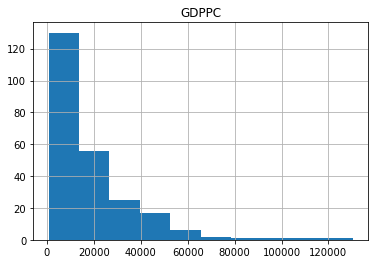

In [224]:
gdp_2014.hist(column='GDPPC', bins=10);

In [225]:
gdp_2014["GDPPC"].describe()

count       240.000000
mean      18034.303556
std       19320.930599
min         672.681648
25%        4301.187365
50%       11868.067810
75%       24388.408410
max      130439.106674
Name: GDPPC, dtype: float64

Find the top 5 counties and bottom 5 countries by GDP per capita in
2014.

In [226]:
#top 5 countries
gdp_2014.groupby(['GDPPC','Country']).size().sort_values(ascending=False)

GDPPC          Country                 
130439.106674  Macao SAR, China            1
116693.507701  Qatar                       1
7740.681033    Belize                      1
7147.563077    Guatemala                   1
7104.525483    Morocco                     1
                                          ..
17131.386907   Venezuela                   1
17130.732033   Iran                        1
16853.568469   Azerbaijan                  1
16606.919023   Gabon                       1
672.681648     Central African Republic    1
Length: 240, dtype: int64

Now, return to the full dataset, gdp_df. Pivot the data for 1990 and 2017
(using the pandas .pivot_table() method or another method) so that
each row corresponds to a country, each column corresponds to a year,
and the values in the table give the GDP_Per_Capita amount. Drop any
rows that are missing values for either 1990 or 2017. Save the result to a
dataframe named gdp_pivoted.

In [227]:
gdp_1990_2017 = gdp_df.groupby("Years")
#.get_group('1990','2017')

In [228]:
# gdp_pivoted = gdp_df.pivot_table(['Years', 'GDP'], 'Country')
gdp_pivoted = gdp_df.pivot_table(values="GDPPC", index="Country", columns=['Years'])[[1990, 2017]].dropna()

In [229]:
gdp_pivoted

Years,1990.0,2017.0
Country,,
Albania,4458.247115,11796.719185
Algeria,10300.015042,13822.389087
Angola,4761.229638,6044.972035
Antigua and Barbuda,17454.549799,22400.379562
Arab World,10491.507721,15542.746104
...,...,...
Vietnam,1457.594613,6233.485045
World,8966.014072,15527.280228
Yemen,3425.707169,2404.422370


Create a new column in gdp_pivoted named Percent_Change. This
column should contain the percent change in GDP_Per_Capita from 1990
to 2017. Hint: Percent change is calculated as 100*(New Value - Old
Value) / Old Value.

In [230]:
gdp_pivoted["gdp_per_capita"] = (gdp_pivoted[2017] - gdp_pivoted[1990]) * 100 / gdp_pivoted[1990]

In [231]:
gdp_pivoted.head()

Years,1990.0,2017.0,gdp_per_capita
Country,,,
Albania,4458.247115,11796.719185,164.604426
Algeria,10300.015042,13822.389087,34.197756
Angola,4761.229638,6044.972035,26.962413
Antigua and Barbuda,17454.549799,22400.379562,28.335476
Arab World,10491.507721,15542.746104,48.145972


How many countries experienced a negative percent change in GDP per
capita from 1990 to 2017? Answer: 20

In [234]:
gdp_pivoted_sorted = gdp_pivoted.sort_values("gdp_per_capita", ascending=False)

In [235]:
gdp_pivoted_sorted.tail(21)

Years,1990.0,2017.0,gdp_per_capita
Country,,,
Niger,893.012648,920.626618,3.092226
Comoros,2580.500555,2555.966364,-0.950753
Kyrgyz Republic,3474.667969,3393.617990,-2.332596
Aruba,37140.024657,35861.828118,-3.441561
Guinea-Bissau,1633.612989,1576.748994,-3.480873
Congo,5323.022707,5103.142821,-4.130734
The Gambia,2448.493198,2240.327478,-8.501789
The Bahamas,31005.636485,28318.107428,-8.667873
Zimbabwe,2819.549467,2568.410072,-8.907075


17: Which country had the highest % change in GDP per capita? Create a
line plot showing this country’s GDP per capita for all years from 1990
to 2017. Create another showing the country with the second highest %
change in GDP. How do the trends in these countries compare?
Bonus: Put both line charts on the same plot.

Equatorial Guinea

In [236]:
#Equatorial Guinea data and china
gdp_df_eg = gdp_df.groupby('Country',).get_group('Equatorial Guinea')
gdp_df_cn = gdp_df.groupby('Country',).get_group('China')

In [237]:
gdp_df_eg.head()

,Country,Years,GDPPC
1691,Equatorial Guinea,2018.0,20181.132964
1692,Equatorial Guinea,2017.0,22298.942144
1693,Equatorial Guinea,2016.0,24296.603580
1694,Equatorial Guinea,2015.0,27708.638182
1695,Equatorial Guinea,2014.0,31743.410748


In [238]:
gdp_df_cn.head()

,Country,Years,GDPPC
1126,China,2018.0,16181.777716
1127,China,2017.0,15253.993071
1128,China,2016.0,14368.630801
1129,China,2015.0,13534.846237
1130,China,2014.0,12725.089099


In [239]:
#china and equatorial from 1990 to 2017
gdp_df_eg_year = gdp_df_eg[(gdp_df_eg["Years"] >= 1990) & (gdp_df_eg["Years"] <= 2017)]
gdp_df_cn_year = gdp_df_cn[(gdp_df_cn["Years"] >= 1990) & (gdp_df_cn["Years"] <= 2017)]

In [240]:
gdp_df_eg_year.head()

,Country,Years,GDPPC
1692,Equatorial Guinea,2017.0,22298.942144
1693,Equatorial Guinea,2016.0,24296.603580
1694,Equatorial Guinea,2015.0,27708.638182
1695,Equatorial Guinea,2014.0,31743.410748
1696,Equatorial Guinea,2013.0,32959.108100


In [241]:
gdp_df_cn_year.head()

,Country,Years,GDPPC
1127,China,2017.0,15253.993071
1128,China,2016.0,14368.630801
1129,China,2015.0,13534.846237
1130,China,2014.0,12725.089099
1131,China,2013.0,11919.607104


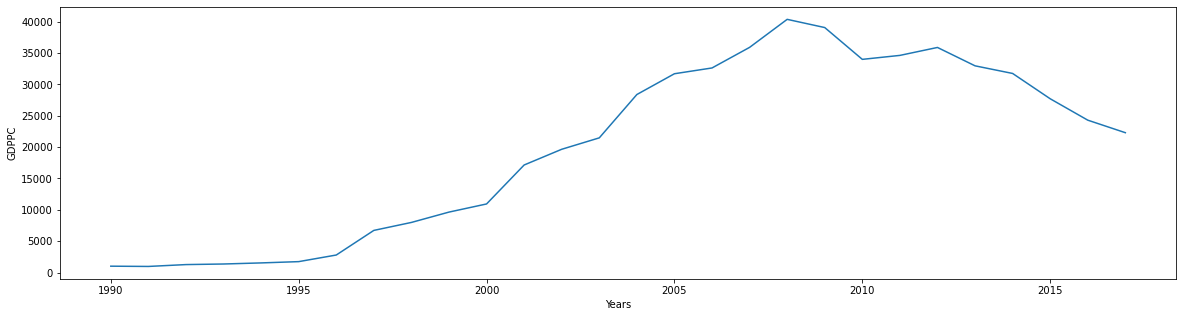

In [248]:
plt.figure(figsize=(20,5))
sns.lineplot(data= gdp_df_eg_year,x =gdp_df_eg_year["Years"],y=gdp_df_eg_year["GDPPC"])

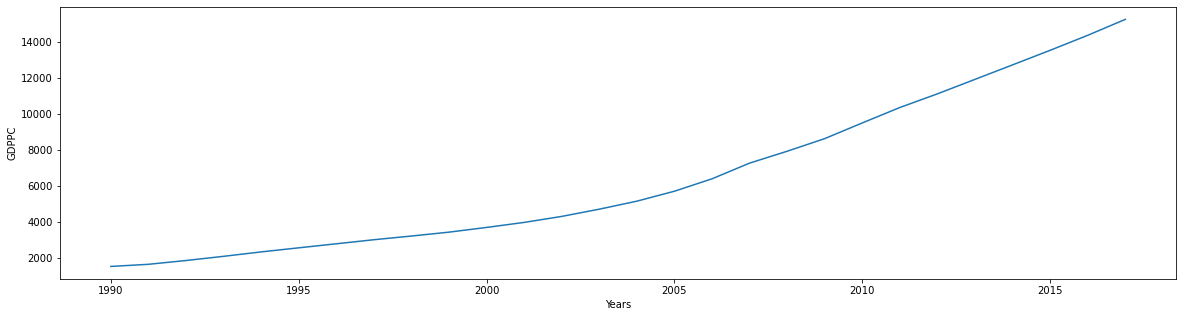

In [249]:
plt.figure(figsize=(20,5))
sns.lineplot(data= gdp_df_cn_year,x =gdp_df_cn_year["Years"],y=gdp_df_cn_year["GDPPC"])

TypeError: float() argument must be a string or a number, not 'AxesSubplot'

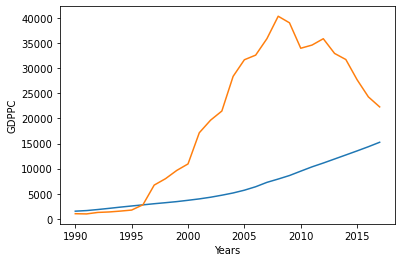

In [251]:
#plt.figure(figsize=(20,5))
y1 = sns.lineplot(data= gdp_df_cn_year,x =gdp_df_cn_year["Years"],y=gdp_df_cn_year["GDPPC"])

#plt.figure(figsize=(20,5))
x1 = sns.lineplot(data= gdp_df_eg_year,x =gdp_df_eg_year["Years"],y=gdp_df_eg_year["GDPPC"])

plt.plot(x1, label = "line 1")
plt.plot(y1, label = "line 1")
plt.show()

Read in continents.csv contained in the data folder into a new dataframe
called continents. We will be using this dataframe to add a new column
to our dataset.

In [252]:
continents = pd.read_csv("continents.csv")

Merge gdp_df and continents. Keep only the countries that appear in
both data frames. Save the result back to gdp_df.

In [253]:
gdp_df = pd.merge(gdp_df, continents, how='inner', on='Country')

In [254]:
gdp_df.head()

,Country,Years,GDPPC,Continent
0,Afghanistan,2018.0,1734.723214,Asia
1,Afghanistan,2017.0,1758.465636,Asia
2,Afghanistan,2016.0,1757.023490,Asia
3,Afghanistan,2015.0,1766.593077,Asia
4,Afghanistan,2014.0,1795.735834,Asia


Determine the number of countries per continent. Create a bar chart
showing this

In [255]:
gdp_df['Continent'].value_counts()

Africa           1399
Europe           1243
Asia             1226
North America     739
Oceania           379
South America     348
Name: Continent, dtype: int64

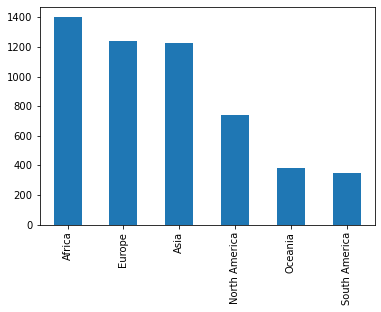

In [256]:
gdp_df['Continent'].value_counts().plot(kind = 'bar')

Creat a seaborn boxplot showing GDP per capita in 2014 split out by
continent. What do you notice?


In [257]:
gdp_df.head()

,Country,Years,GDPPC,Continent
0,Afghanistan,2018.0,1734.723214,Asia
1,Afghanistan,2017.0,1758.465636,Asia
2,Afghanistan,2016.0,1757.023490,Asia
3,Afghanistan,2015.0,1766.593077,Asia
4,Afghanistan,2014.0,1795.735834,Asia


In [258]:
gdp_con_2014 = gdp_df[(gdp_df["Years"] == 2014)]

In [259]:
gdp_con_2014.head()

,Country,Years,GDPPC,Continent
4,Afghanistan,2014.0,1795.735834,Asia
21,Albania,2014.0,10700.993216,Europe
50,Algeria,2014.0,13557.769757,Africa
79,Angola,2014.0,6813.052106,Africa
108,Antigua and Barbuda,2014.0,20440.540555,North America


In [260]:
gdp_con_2014['Continent'].value_counts()

Africa           49
Europe           45
Asia             44
North America    25
Oceania          14
South America    12
Name: Continent, dtype: int64

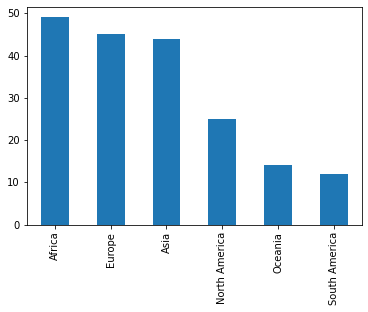

In [261]:
gdp_con_2014['Continent'].value_counts().plot(kind = 'bar')

Read in internet_use.csv into a DataFrame called internet_df. You will
most likely get an error message when doing this - figure out what is going
wrong and fix it. Take a look at the first and last five rows and make any
corrections to your read_csv() call to fix this. Again, do not modify the
original datasets.

In [262]:
internet_df = pd.read_csv("UNInternetusage.csv", error_bad_lines=False)

b'Skipping line 4675: expected 4 fields, saw 6\n'


Drop the Value Footnotes column and then rename the columns to ‘Country’, ‘Year’, and ‘Internet_Users_Pct’.

In [263]:
internet_df = internet_df.drop("Value Footnotes", axis=1)

In [264]:
new_columns_ie = {'Country or Area' : 'Country',
               'Year': 'Years',
               'Value': 'Internet_Users_Pct',}
internet_df.rename(columns = new_columns_ie, inplace=True)

How many rows and columns does this new dataset have? What are the
types of its columns? Ensure that the Internet_Users_Pct column is a
numeric data type and fix it if it is not.

In [265]:
internet_df = internet_df.dropna()

In [266]:
internet_df['Years']= internet_df['Years'].astype(str).astype(float)

In [267]:
internet_df.shape

(4495, 3)

4675 rows and 3 columns

In [268]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4495 entries, 0 to 4494
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             4495 non-null   object 
 1   Years               4495 non-null   float64
 2   Internet_Users_Pct  4495 non-null   float64
dtypes: float64(2), object(1)
memory usage: 140.5+ KB


What is the first year that has a nonzero internet users percentage reported?
What is the general trend in internet users percentage over the years. Pick
a visualization that you think illustrates this trend well. 
# Answer
2002

In [274]:
internet_df_non = internet_df[(internet_df["Internet_Users_Pct"] == 1) & (internet_df["Internet_Users_Pct"] <= 1.01)]

In [275]:
internet_df_non.sort_values('Years',ascending=True)

,Country,Years,Internet_Users_Pct
4043,Togo,2002.0,1.0
300,Bangladesh,2006.0,1.0
768,Central African Rep.,2008.0,1.0
1965,Iraq,2008.0,1.0
627,Burundi,2010.0,1.0
1724,Guinea,2010.0,1.0


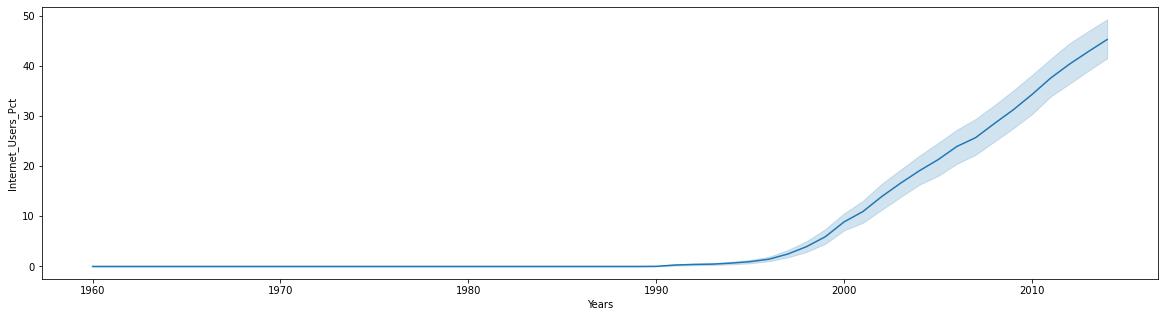

In [276]:
plt.figure(figsize=(20,5))
sns.lineplot(data= internet_df,x =internet_df["Years"],y=internet_df["Internet_Users_Pct"])

Merge gdf_df and internet_df (on Country and Year) into a single
DataFrame named gdp_and_internet_use. Keep only countries and years
that appear in both tables.
Difficult Bonus: Do not attempt this part until you have completed all
other portions of the data question. Some countries have slightly different
names in the internet use and gdp dataframes. For example, the Central
African Republic is “Central African Republic” in the gdp dataframe and
“Central African Rep.” in the internet use dataframe. Find as many
instances like this as you can and resolve them so that when merging you
keep the maximum number of countries possible.

In [277]:
gdp_and_internet_use = pd.merge(gdp_df, internet_df, how='inner', on=['Country','Years']) 

Look at the first five rows of your new data frame to confirm it merged
correctly. Also, check the last five rows to make sure the data is clean and
as expected.

In [278]:
gdp_and_internet_use.head()

,Country,Years,GDPPC,Continent,Internet_Users_Pct
0,Afghanistan,2014.0,1795.735834,Asia,6.390000
1,Afghanistan,2013.0,1807.762344,Asia,5.900000
2,Afghanistan,2012.0,1772.764974,Asia,5.454545
3,Afghanistan,2011.0,1626.764793,Asia,5.000000
4,Afghanistan,2010.0,1671.581238,Asia,4.000000


Create a new DataFrame, named gdp_and_internet_use_2014 by extracting data for the year 2014 from gdp_and_internet_use. What is the
mean internet users percentage in 2014? How many countries have at least
90% internet users in 2014?


In [279]:
# extract 2014 data from gdp_and_internet_use 
gdp_and_internet_use_2014 = gdp_and_internet_use.groupby("Years").get_group(2014)

In [280]:
gdp_and_internet_use_2014.head()

,Country,Years,GDPPC,Continent,Internet_Users_Pct
0,Afghanistan,2014.0,1795.735834,Asia,6.39
13,Albania,2014.0,10700.993216,Europe,60.10
34,Algeria,2014.0,13557.769757,Africa,18.09
56,Angola,2014.0,6813.052106,Africa,21.26
76,Antigua and Barbuda,2014.0,20440.540555,North America,64.00


Find the countries that had the top 3 largest GDP per capita figures for
2014.Create a seaborn FacetGrid showing the change in internet user
percentage over time for these five countries. Each individual figure in the
facet grid will represent a single country. What trends do you notice?

# Answer
* Qatar
* Luxembourg
* Singapore

In [281]:
gdp_and_internet_use_2014.sort_values('GDPPC',ascending=False)

,Country,Years,GDPPC,Continent,Internet_Users_Pct
2556,Qatar,2014.0,116693.507701,Asia,91.49
1812,Luxembourg,2014.0,92349.186429,Europe,94.67
2765,Singapore,2014.0,81965.361071,Asia,82.00
1685,Kuwait,2014.0,72588.670676,Asia,78.70
2310,Norway,2014.0,63328.259526,Europe,96.30
...,...,...,...,...,...
1765,Liberia,2014.0,1257.625441,Africa,5.41
2116,Mozambique,2014.0,1222.452874,Africa,5.94
1856,Malawi,2014.0,1142.530804,Africa,5.83
2270,Niger,2014.0,900.136918,Africa,1.95


In [282]:
# collect qatar luxembourg and singapore data from gdp and interenet use
gdp_three = gdp_and_internet_use[(gdp_and_internet_use["Country"] == 'Qatar') | (gdp_and_internet_use["Country"] == 'Luxembourg')| (gdp_and_internet_use["Country"] == 'Singapore') ]

In [283]:
gdp_three.tail()

,Country,Years,GDPPC,Continent,Internet_Users_Pct
2785,Singapore,1994.0,43835.783293,Asia,1.185204
2786,Singapore,1993.0,40714.217145,Asia,0.763278
2787,Singapore,1992.0,37463.009189,Asia,0.471368
2788,Singapore,1991.0,36201.887548,Asia,0.161504
2789,Singapore,1990.0,34911.740001,Asia,0.000000


C:\Users\matth\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


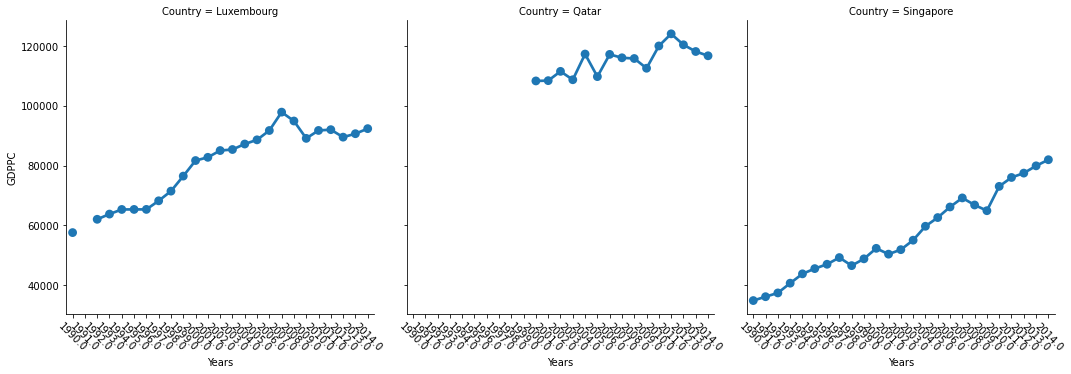

In [285]:
# Factor Plot
g = sns.factorplot(x='Years', 
                   y='GDPPC', 
                   data=gdp_three, 
                   # A recent update in Matplotlib broke how the hue argument works in Seaborn with some plots see: https://github.com/mwaskom/seaborn/issues/1697
                   #hue='quality',  # Color by stage
                   col='Country',  # Separate by stage
                   kind='point') # Swarmplot
 
# Rotate x-axis labels
g.set_xticklabels(rotation=-45);

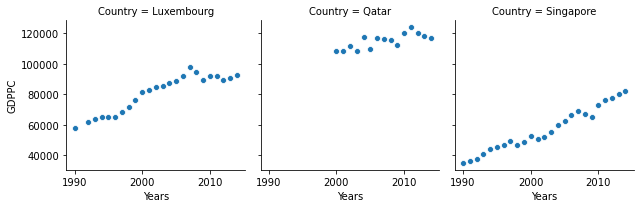

In [286]:
g = sns.FacetGrid(gdp_three, col="Country")
g.map(sns.scatterplot, "Years", "GDPPC");

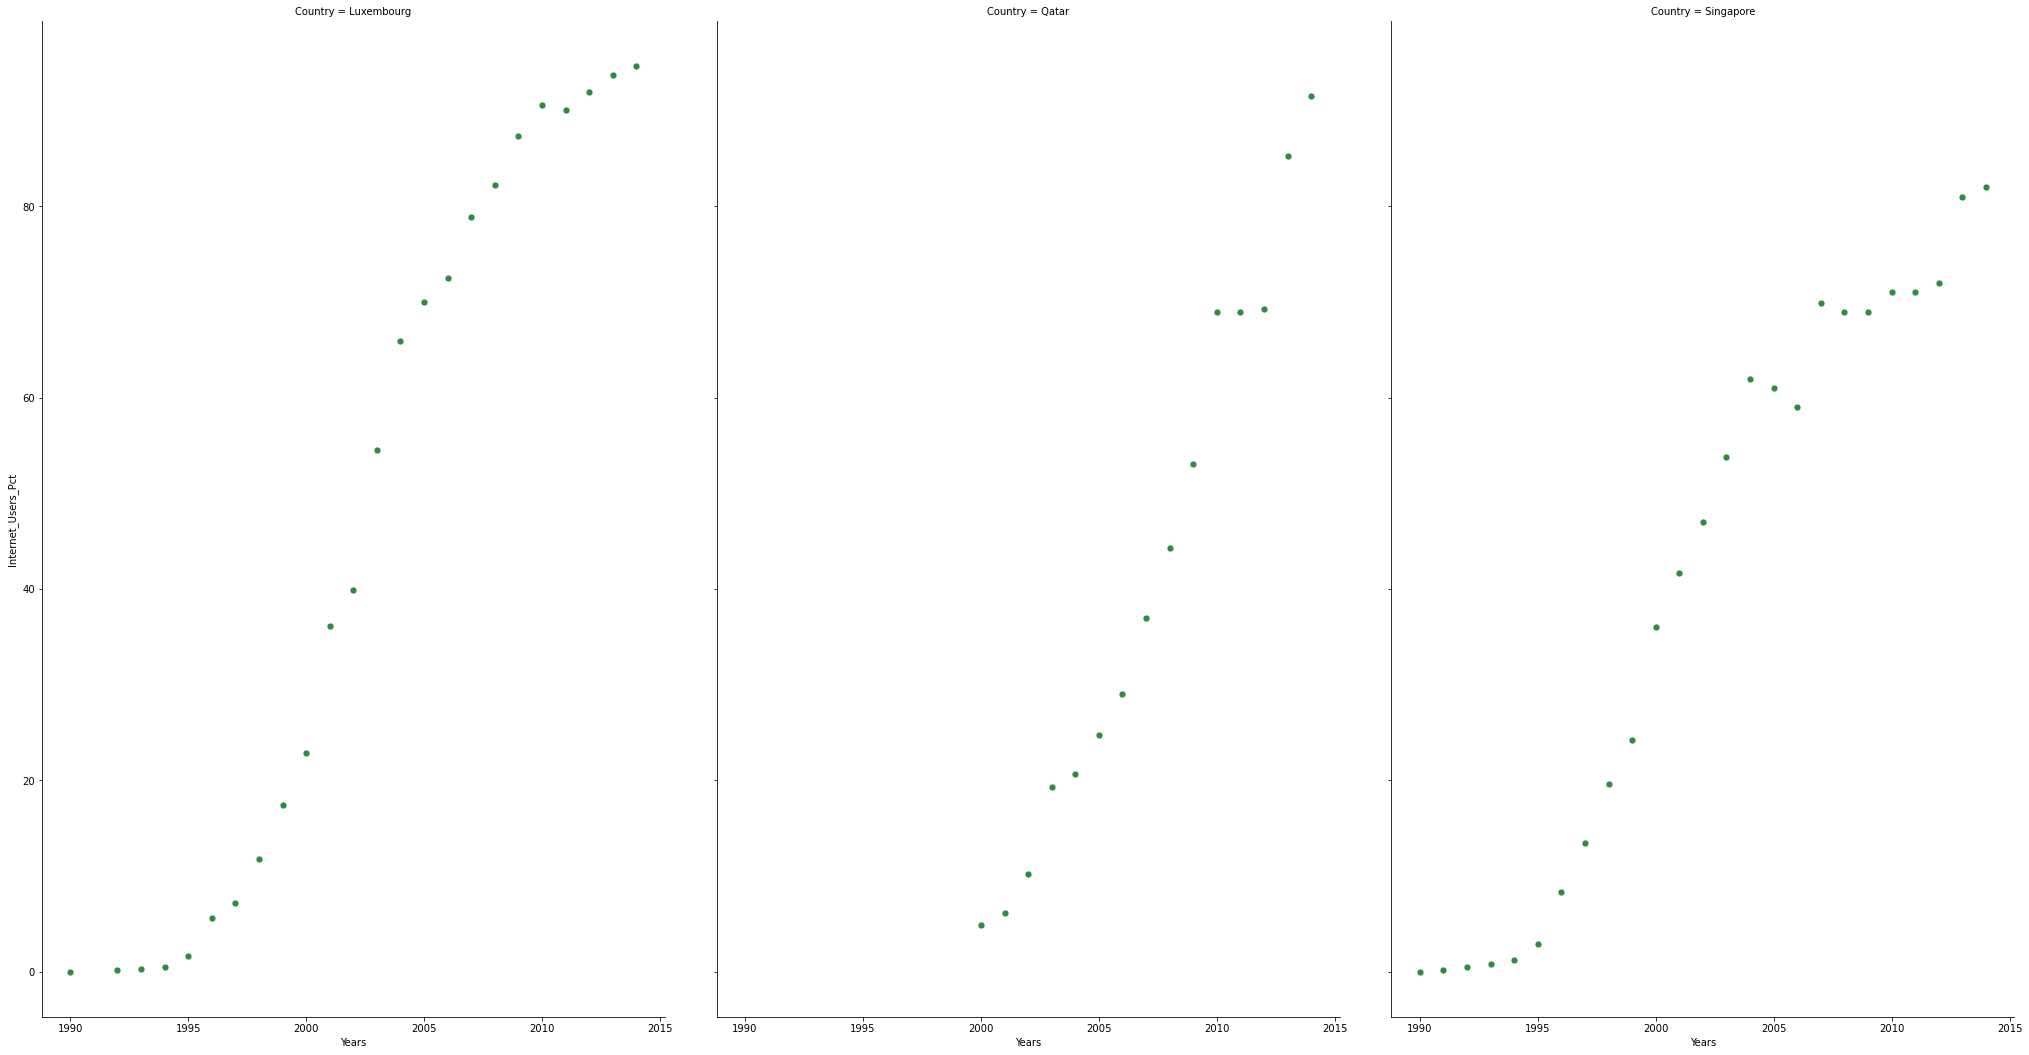

In [287]:
#plt.figure(figsize=(10,15))
g = sns.FacetGrid(gdp_three, col="Country",margin_titles=True)
g.map(sns.scatterplot, "Years", "Internet_Users_Pct", color="#338844", edgecolor="white", s=50, lw=1)
g.fig.set_size_inches(30,20);

Create a scatter plot of Internet Use vs GDP per Capita for the year 2014.
What do you notice?

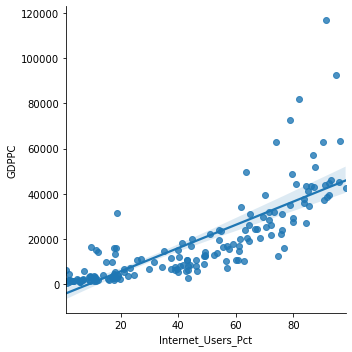

In [288]:
sns.lmplot(x='Internet_Users_Pct', y='GDPPC', data=gdp_and_internet_use_2014);

Find the correlation between GDP per Capita and Internet Use for the
year 2014. What is the meaning of this number?

# Answer
Correlation is 0.787989
The meaning is how close the relationship is between GDP per capita and percentage of internet users. The closer to 1, the stronger the connection. 

In [289]:
gdp_and_internet_use_2014[['GDPPC', 'Internet_Users_Pct']].corr()

,GDPPC,Internet_Users_Pct
GDPPC,1.000000,0.787989
Internet_Users_Pct,0.787989,1.000000


Add a column to gdp_and_internet_use_2014 and calculate the logarithm of GDP per capita. Find the correlation between the log of GDP
per capita and internet users percentage. How does this compare to the
calculation in the previous part?

In [290]:
type(gdp_and_internet_use_2014)

pandas.core.frame.DataFrame

In [291]:
gdp_and_internet_use_2014["log of GDPPC"] = np.log(gdp_and_internet_use_2014['GDPPC'])

<ipython-input-291-915bb2ef2748>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_and_internet_use_2014["log of GDPPC"] = np.log(gdp_and_internet_use_2014['GDPPC'])


In [292]:
gdp_and_internet_use_2014.head()

,Country,Years,GDPPC,Continent,Internet_Users_Pct,log of GDPPC
0,Afghanistan,2014.0,1795.735834,Asia,6.39,7.493170
13,Albania,2014.0,10700.993216,Europe,60.10,9.278092
34,Algeria,2014.0,13557.769757,Africa,18.09,9.514715
56,Angola,2014.0,6813.052106,Africa,21.26,8.826595
76,Antigua and Barbuda,2014.0,20440.540555,North America,64.00,9.925275


In [293]:
gdp_and_internet_use_2014[['log of GDPPC', 'Internet_Users_Pct']].corr()

,log of GDPPC,Internet_Users_Pct
log of GDPPC,1.000000,0.884432
Internet_Users_Pct,0.884432,1.000000


The correlation increased to 0.8844

Filter the original dataset down to just the United States for all available
years. Calculate correlation between internet use and gdp per capita. Is
this meaningful or useful?

In [294]:
us_un_df = gdp_and_internet_use[(gdp_and_internet_use["Country"] == 'United States')]

In [295]:
us_un_df[['GDPPC', 'Internet_Users_Pct']].corr()

,GDPPC,Internet_Users_Pct
GDPPC,1.000000,0.991618
Internet_Users_Pct,0.991618,1.000000


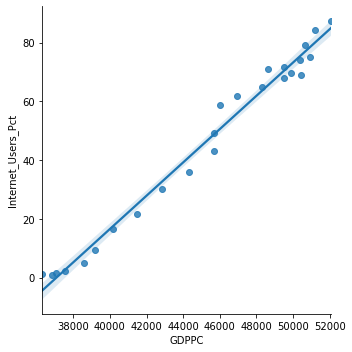

In [296]:
sns.lmplot(x='GDPPC', y='Internet_Users_Pct', data=us_un_df);

# project

 Prepare a short 5 minute presentation of your findings. Report any interesting correlations
you find. Include visualizations and consider adding interactivity with
ipywidgets. This presentation can be done either in a Jupyter Notebook
or using another presentation software, such as PowerPoint.

# Abstract
Compare the perecentage of UK and US marriage rates between men and women, and use the United Nations internet data to compare the two.

# Why marriage?
* Impacts on high school graduation
* Crime rate
* Health care cost
* Wealth
* Mental Health

# Why 25 to 29?
* Most common age range for people to get married

# Why UK and US
* Similar cultures

# Categories
* Single
* Married
* Widowed
* Divorced
* Separated
* Consensual Union
* Divorced/Separated

# Average percentage difference between men and women
Men: 47
Women: 57

In [157]:
#import marriage status data
m_status = pd.read_csv("Marital status of men and women.csv")

In [158]:
m_status = m_status.drop(m_status.iloc[:,10:],axis = 1)

In [159]:
#remove last 25 rows
m_status = m_status.drop(m_status.index[-24:])

In [160]:
# remove first 2 rows
m_status = m_status.drop(m_status.index[[0,1,2]])

In [161]:
md_status = m_status.drop(["Unnamed: 6","Unnamed: 1","Unnamed: 2","Unnamed: 7","Unnamed: 8"], axis=1)

In [162]:
#rename columns
new_columns = {'United Nations, Department of Economic and Social Affairs' : 'Country',
               'Unnamed: 3': 'Years',
               'Unnamed: 4': 'Sex',
               'Unnamed: 5': 'Marital Status',
               'Unnamed: 9': '25 to 29',
              }
md_status.rename(columns = new_columns, inplace=True)

In [163]:
md_status['Years']= md_status['Years'].astype(str).astype(float)

In [164]:
md_status['25 to 29']= md_status['25 to 29'].astype(str).astype(float)

In [165]:
md_status["Country"]= md_status["Country"].replace("United States of America", "United States")
md_status.head()

,Country,Years,Sex,Marital Status,25 to 29
3,Afghanistan,1973.0,Men,Single,38.5
4,Afghanistan,1973.0,Men,Married,59.1
5,Afghanistan,1973.0,Men,Widowed,2.3
6,Afghanistan,1973.0,Men,Divorced,0.0
7,Afghanistan,1973.0,Women,Single,3.7


In [166]:
#Gather data from us and uk

m_status_west = md_status[(md_status["Country"] == 'United States') | (md_status["Country"] == 'United Kingdom')]

In [169]:
m_status_west['Years'].value_counts()

2009.0    18
2001.0    12
2000.0    12
1990.0    10
1980.0    10
1970.0    10
1981.0     8
1991.0     8
1971.0     8
Name: Years, dtype: int64

In [170]:
m_status_west['Marital Status'].value_counts()

Single                20
Married               20
Widowed               20
Divorced              18
Separated             12
Consensual union       4
Divorced/Separated     2
Name: Marital Status, dtype: int64

In [171]:
# data for people who are married
ma_status_west = m_status_west.groupby("Marital Status").get_group('Married')

In [172]:
ma_status_west.sort_values("25 to 29", ascending=True)

,Country,Years,Sex,Marital Status,25 to 29
7639,United Kingdom,2009.0,Men,Married,17.2
7627,United Kingdom,2001.0,Men,Married,22.6
7643,United Kingdom,2009.0,Women,Married,25.8
7633,United Kingdom,2001.0,Women,Married,32.6
7741,United States,2009.0,Men,Married,34.1
7729,United States,2000.0,Men,Married,38.6
7619,United Kingdom,1991.0,Men,Married,42.9
7746,United States,2009.0,Women,Married,45.5
7719,United States,1990.0,Men,Married,46.0
7735,United States,2000.0,Women,Married,49.1


In [173]:
women_status_west = ma_status_west.groupby("Sex").get_group('Women')
men_status_west = ma_status_west.groupby("Sex").get_group('Men')

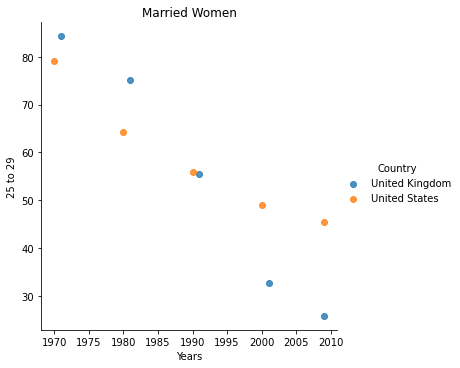

In [199]:
#sns.lmplot(x='25 to 29', y='Years', data=m_status_west);
#plt.title('Married Women')
sns.lmplot(x='Years', y='25 to 29', data=women_status_west,
           fit_reg=False, # Remove the regression line
           hue='Country').set(title ='Married Women');   # Color by quality

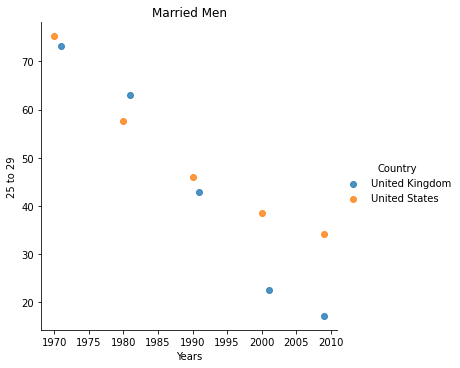

In [200]:
#sns.lmplot(x='25 to 29', y='Years', data=m_status_west);
sns.lmplot(x='Years', y='25 to 29', data=men_status_west,
           fit_reg=False, # Remove the regression line
           hue='Country').set(title ='Married Men');   # Color by quality

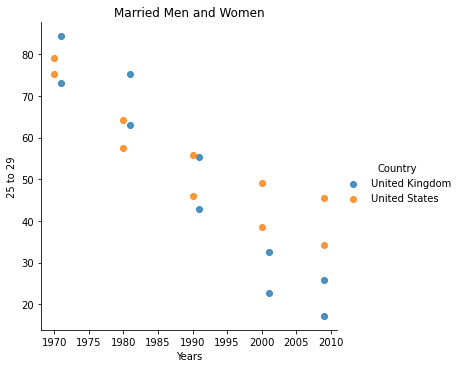

In [201]:
#sns.lmplot(x='25 to 29', y='Years', data=m_status_west);
sns.lmplot(x='Years', y='25 to 29', data=ma_status_west,
           fit_reg=False, # Remove the regression line
           hue='Country').set(title ='Married Men and Women');   # Color by quality

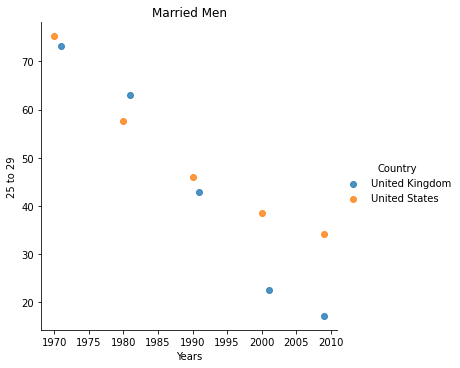

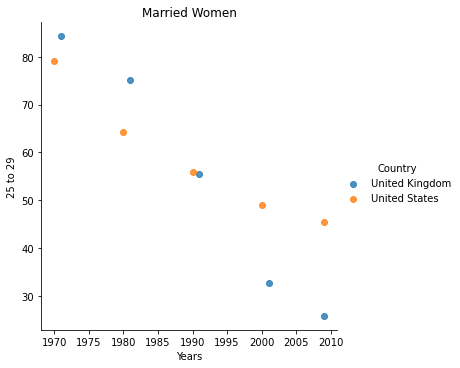

In [205]:
sns.lmplot(x='Years', y='25 to 29', data=men_status_west,
           fit_reg=False, # Remove the regression line
           hue='Country').set(title ='Married Men');   # Color by quality

sns.lmplot(x='Years', y='25 to 29', data=women_status_west,
           fit_reg=False, # Remove the regression line
           hue='Country').set(title ='Married Women');   # Color by quality

plt.show()

In [177]:
# internet data for us and uk
internet_df_west = internet_df[(internet_df["Country"] == 'United States') | (internet_df["Country"] == 'United Kingdom')]

In [178]:
internet_df_west.head()

,Country,Years,Internet_Users_Pct
4252,United Kingdom,2014.0,91.610000
4253,United Kingdom,2013.0,89.844100
4254,United Kingdom,2012.0,87.479998
4255,United Kingdom,2011.0,85.379999
4256,United Kingdom,2010.0,85.000000


<Figure size 3600x432 with 0 Axes>

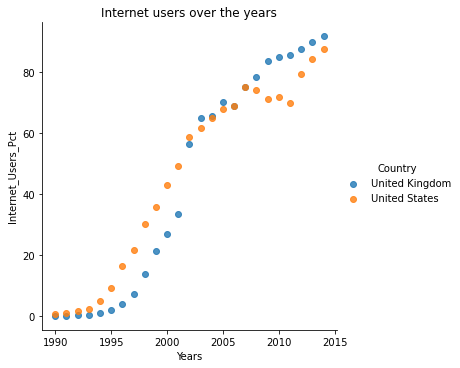

In [203]:
#sns.lmplot(x='25 to 29', y='Years', data=m_status_west);
plt.figure(figsize=(50, 6))
sns.lmplot(x='Years', y='Internet_Users_Pct', data=internet_df_west,
           fit_reg=False, # Remove the regression line
           hue='Country',).set(title ='Internet users over the years');   # Color by quality


In [180]:
internet_df_west.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 4252 to 4301
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             50 non-null     object 
 1   Years               50 non-null     float64
 2   Internet_Users_Pct  50 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.6+ KB


In [181]:
#group the data for ie and marriage status
ie_ma_west = pd.merge(internet_df_west, m_status_west, how='inner', on='Country')

In [182]:
ie_ma_west.shape

(2400, 7)

In [183]:
ie_ma_west.tail()

,Country,Years_x,Internet_Users_Pct,Years_y,Sex,Marital Status,25 to 29
2395,United States,1990.0,0.784729,2009.0,Women,Single,46.3
2396,United States,1990.0,0.784729,2009.0,Women,Married,45.5
2397,United States,1990.0,0.784729,2009.0,Women,Widowed,0.3
2398,United States,1990.0,0.784729,2009.0,Women,Divorced,5.1
2399,United States,1990.0,0.784729,2009.0,Women,Separated,2.9


In [184]:
# correalation
ie_ma_west[['25 to 29', 'Internet_Users_Pct']].corr()

,25 to 29,Internet_Users_Pct
25 to 29,1.000000,-0.001616
Internet_Users_Pct,-0.001616,1.000000


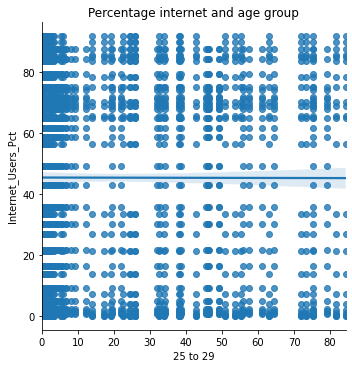

In [209]:
sns.lmplot(x='25 to 29', y='Internet_Users_Pct', data=ie_ma_west).set(title ='Percentage internet and age group');

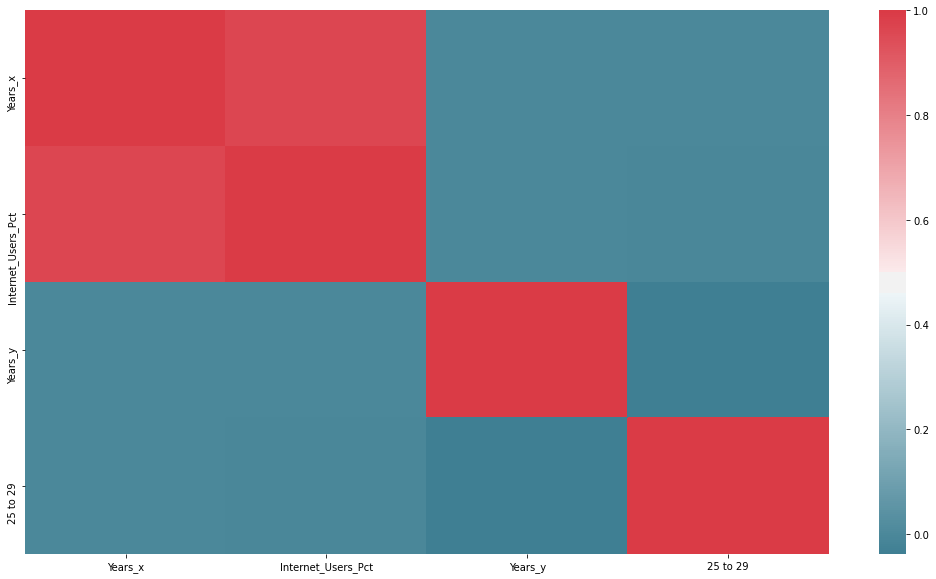

In [186]:
# Calculate correlations
corr = ie_ma_west.corr()
 
# Heatmap
plt.figure(figsize=(18, 10))
sns.heatmap(corr, cmap=sns.diverging_palette(220, 10, as_cmap=True));

In [188]:
# gdp data for us and uk
gdp_df_west = gdp_df[(gdp_df["Country"] == 'United States') | (gdp_df["Country"] == 'United Kingdom')]

<Figure size 3600x432 with 0 Axes>

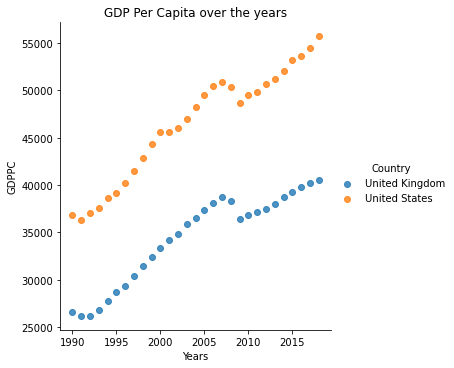

In [204]:
#sns.lmplot(x='25 to 29', y='Years', data=m_status_west);
plt.figure(figsize=(50, 6))
sns.lmplot(x='Years', y='GDPPC', data=gdp_df_west,
           fit_reg=False, # Remove the regression line
           hue='Country',).set(title ='GDP Per Capita over the years');   # Color by quality


In [190]:
#group the data
gdp_ma_west = pd.merge(gdp_df_west, m_status_west, how='inner', on='Country')

In [191]:
gdp_ma_west.tail()

,Country,Years_x,GDPPC,Continent,Years_y,Sex,Marital Status,25 to 29
2779,United States,1990.0,36812.545745,North America,2009.0,Women,Single,46.3
2780,United States,1990.0,36812.545745,North America,2009.0,Women,Married,45.5
2781,United States,1990.0,36812.545745,North America,2009.0,Women,Widowed,0.3
2782,United States,1990.0,36812.545745,North America,2009.0,Women,Divorced,5.1
2783,United States,1990.0,36812.545745,North America,2009.0,Women,Separated,2.9


In [192]:
# correalation
gdp_ma_west[['25 to 29', 'GDPPC']].corr()

,25 to 29,GDPPC
25 to 29,1.000000,-0.052533
GDPPC,-0.052533,1.000000


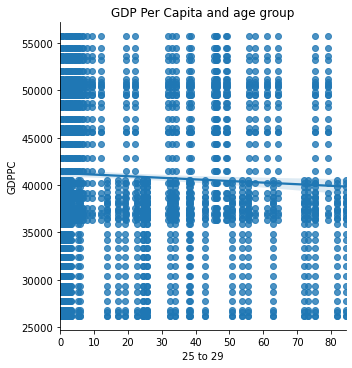

In [208]:
sns.lmplot(x='25 to 29', y='GDPPC', data=gdp_ma_west).set(title ='GDP Per Capita and age group');

# If I had more time(and was better at this)
* More Countries
* Other Marital Status
* Better Visuals

# Conclusions 
The percentage of married men and women has been decreasing over the years. The UK has seen a deeper decrease than the US in percentage of marriage status. The percentage of internet users and GDP per capita has increased over over the years. The analysis does not prove that an increase in GDP Per capita or percentage of internet users leads to a decrease in the percentage of married status in the UK and US. 